<hr>
<h2>Creating Circuits</h2>

In [1]:
import qiskit

In [2]:
from qiskit import QuantumCircuit

A quantum circuit is composed of quantum and classical registers.

In [3]:

# Creating a quantum circuit with 2 qubit and 2 classical bit
circuit = QuantumCircuit(1,1)

For visulization we will plot the State and the Bloch sphere representation

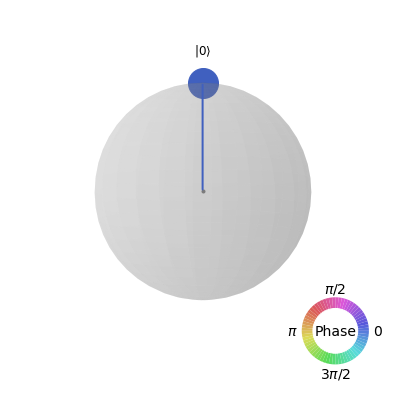

In [4]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

state= Statevector.from_instruction(circuit)
plot_state_qsphere(state) 


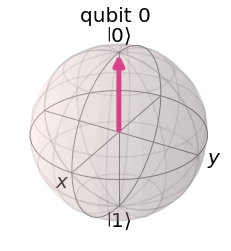

In [5]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state)

From the visualization above we can see that the initial state of the system is in state ∣0⟩. Take note that in Qiskit, the initial state of the system before applying any operation is always in state ∣0⟩

### GATES

Here are some single qubit _gates_ and how we apply them in Qiskit. Gates are applied to quantum circuit by specifying the qubits which they apply to.

#Apply NOT gate to qubit 2

circuit.x(2)

#Apply Z gate to qubit 2

circuit.z(2)

#Apply H gate to qubit 3

circuit.h(3)



#### Applying NOT gate to the qubit 

In [9]:
circuit.x(0)
circuit.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

Let's visualize the state after applying the NOT gate

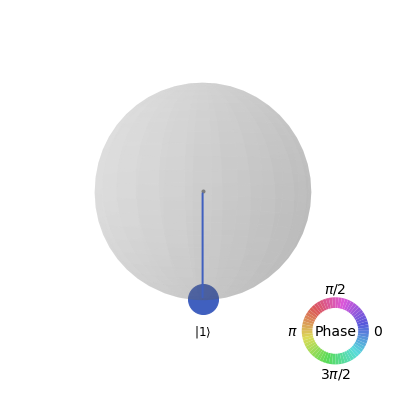

In [10]:
state= Statevector.from_instruction(circuit)
plot_state_qsphere(state) 

We can see a bit flip from state ∣0⟩ to state ∣1⟩ indicated by the visualizations

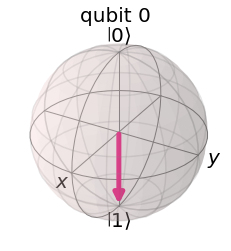

In [11]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state)

### Let's apply another two NOT gate successively and see what state the qubit will be in

In [17]:
circuit2 = QuantumCircuit(1,1)
circuit2.x(0)
circuit2.x(0)
circuit2.draw()

┌───┐┌───┐
  q: ┤ X ├┤ X ├
     └───┘└───┘
c: 1/══════════

We can see that the state remains in ∣0⟩ indicated by the visualizations. This is because the bit flip is done twice which return the system to its initial state

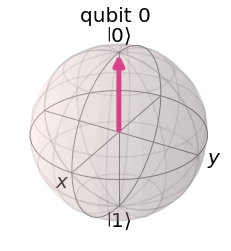

In [19]:
plot_bloch_multivector(state2)

### Applying Z gate

In [9]:
circuit = QuantumCircuit(1,1)
#circuit.h(0)
circuit.z(0)
circuit.draw()

┌───┐┌───┐
  q: ┤ X ├┤ Z ├
     └───┘└───┘
c: 1/══════════

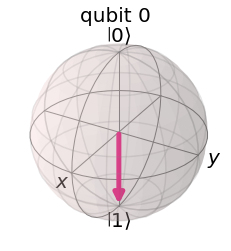

In [11]:

plot_bloch_multivector(state)

### Applying Y gate

In [25]:
circuit = QuantumCircuit(1,1)
circuit.y(0)
circuit.draw()


┌───┐
  q: ┤ Y ├
     └───┘
c: 1/═════

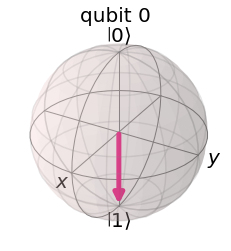

In [26]:
state= Statevector.from_instruction(circuit)
plot_bloch_multivector(state)

### Applying H gate

In [37]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
#circuit.z(0)
circuit.draw()


┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════

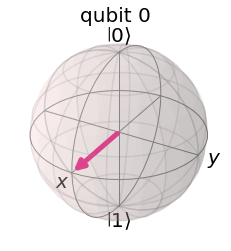

In [38]:
state= Statevector.from_instruction(circuit)
plot_bloch_multivector(state)

### Let's see how hadamard acts on state ∣1⟩

In [39]:
qc2=QuantumCircuit(1)
qc2.x(0)
qc2.h(0)
qc2.draw()

┌───┐┌───┐
q: ┤ X ├┤ H ├
   └───┘└───┘

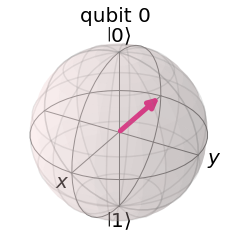

In [41]:
state2= Statevector.from_instruction(qc2)
plot_bloch_multivector(state2)

### Rotation Gates

#Apply RY to qubit 2

circuit.ry(phi, 0)

#Apply Rz to qubit 1

circuit.rx(phi, 1)

#Apply RZ to qubit 3

circuit.rz(phi, 3)

#Apply S gate to qubit 3

circuit.S(phi, 3)

### Where Phi is the angle of rotation

┌─────────┐
q: ┤ Ry(π/3) ├
   └─────────┘

phase: 0 final_state: Statevector([0.8660254+0.j, 0.5      +0.j],
            dims=(2,))


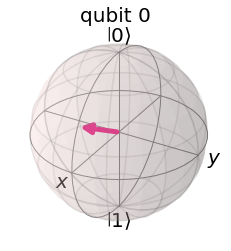

In [51]:
import numpy as np
from qiskit import Aer
from qiskit import execute


phi=[0,np.pi/3,np.pi/2,0.66*np.pi,np.pi] # we define different values for phi
qc4=QuantumCircuit(1)
#qc4.h(0)
qc4.ry(phi[1], 0) # cahnge the index for phi to rotate on different angles

display(qc4.draw())
backend = Aer.get_backend('statevector_simulator')
result=execute(qc4, backend).result()
final_state=result.get_statevector(qc4)
print('phase:',phi[0],'final_state:',final_state)
plot_bloch_multivector(final_state)    